<a href="https://colab.research.google.com/github/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Thesis_06Leukocyte_elastase_FNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Import the neccessary modules
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Step 2: Import the MNIST Fashion Dataset
df = pd.read_csv('/content/drive/MyDrive/Data/Leukocyte_elastase_09_bioactivity_data_2class_binary_active_inactive_pubchem_fp.csv')


In [4]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,target
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1800,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1801,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1802,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop('target', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1800,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1801,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1802,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = df.target
Y

0       0
1       1
2       1
3       1
4       0
       ..
1799    0
1800    0
1801    0
1802    0
1803    0
Name: target, Length: 1804, dtype: int64

In [7]:
df["target"].value_counts()

1    1395
0     409
Name: target, dtype: int64

In [8]:
X.shape

(1804, 881)

In [9]:
Y.shape

(1804,)

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [11]:
X.shape

(1804, 151)

In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((1443, 151), (1443,))

In [14]:
X_test.shape, Y_test.shape

((361, 151), (361,))

#New try#

In [ ]:
pip install tensorflow==2.0.0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(116, input_dim = len(X_train[0, :]), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 116)               17632     
                                                                 
 dense_1 (Dense)             (None, 40)                4680      
                                                                 
 dense_2 (Dense)             (None, 8)                 328       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 22,649
Trainable params: 22,649
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
import numpy as np

In [20]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [21]:
history= model.fit(X_train,Y_train,epochs=200, batch_size=32)

Epoch 1/200
46/46 [==============================] - 2s 4ms/step - loss: 0.3992 - accuracy: 0.7935
Epoch 2/200
46/46 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.8399
Epoch 3/200
46/46 [==============================] - 0s 5ms/step - loss: 0.2775 - accuracy: 0.8635
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.2549 - accuracy: 0.8753
Epoch 5/200
46/46 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.8843
Epoch 6/200
46/46 [==============================] - 0s 6ms/step - loss: 0.2377 - accuracy: 0.8850
Epoch 7/200
46/46 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9016
Epoch 8/200
46/46 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9058
Epoch 9/200
46/46 [==============================] - 0s 5ms/step - loss: 0.2017 - accuracy: 0.9051
Epoch 10/200
46/46 [==============================] - 0s 7ms/step - loss: 0.2059 - accuracy: 0.9064
Epoch 11/

In [22]:
history2= model.fit(X_test,Y_test, epochs=200, batch_size=32)

Epoch 1/200
12/12 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.9030
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9169
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9446
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9584
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9668
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9751
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9723
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9751
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9751
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9751
Epoch 11/

In [23]:
model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9917


[0.01351845357567072, 0.9916897416114807]

In [24]:
print(history.params)

{'verbose': 1, 'epochs': 200, 'steps': 46}


In [25]:
print(history2.params)

{'verbose': 1, 'epochs': 200, 'steps': 12}


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

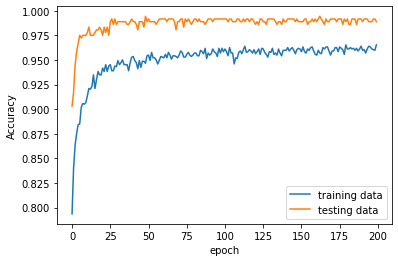

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data','testing data'],loc='lower right')
plt.show()

